In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dn121 = pd.read_csv(r"Metrics\DenseNet121_training_metrics.csv")
swinB = pd.read_csv(r"Metrics\swin_base_patch4_window7_224_training_metrics.csv")

In [3]:
dn121.head()

,epoch,train_loss,val_loss,mean_auc,mean_entropy,f1_micro,f1_macro,precision,recall,hamming_loss,...,roc_auc_Effusion,roc_auc_Emphysema,roc_auc_Fibrosis,roc_auc_Hernia,roc_auc_Infiltration,roc_auc_Mass,roc_auc_Nodule,roc_auc_Pleural_Thickening,roc_auc_Pneumonia,roc_auc_Pneumothorax
0,1,0.429694,0.311329,0.646217,0.362789,0.104064,0.080570,0.498795,0.058092,0.099451,...,0.600155,0.585743,0.694313,0.826697,0.567724,0.577561,0.619441,0.567193,0.748280,0.617559
1,2,0.378342,0.304983,0.689877,0.364300,0.197296,0.130175,0.400858,0.130849,0.106027,...,0.640220,0.688332,0.722440,0.862091,0.608418,0.618661,0.650589,0.603145,0.776580,0.695671
2,3,0.366744,0.299851,0.708309,0.359356,0.225982,0.147841,0.412655,0.155595,0.105952,...,0.661804,0.720734,0.735699,0.880455,0.619082,0.638694,0.662064,0.627220,0.789590,0.719018
3,4,0.360556,0.299043,0.719166,0.354608,0.244809,0.155228,0.386758,0.179082,0.109942,...,0.672410,0.738463,0.748976,0.893502,0.627972,0.650444,0.668596,0.633566,0.799635,0.728619
4,5,0.355568,0.298901,0.725084,0.358127,0.253254,0.167350,0.371920,0.191995,0.112602,...,0.676290,0.748744,0.754705,0.896658,0.634984,0.657819,0.672859,0.641498,0.803900,0.736095


In [4]:
swinB.head()

,epoch,train_loss,val_loss,mean_auc,mean_entropy,f1_micro,f1_macro,precision,recall,hamming_loss,...,roc_auc_Effusion,roc_auc_Emphysema,roc_auc_Fibrosis,roc_auc_Hernia,roc_auc_Infiltration,roc_auc_Mass,roc_auc_Nodule,roc_auc_Pleural_Thickening,roc_auc_Pneumonia,roc_auc_Pneumothorax
0,1,0.360090,0.283268,0.798689,0.298133,0.390948,0.352857,0.389425,0.392483,0.121652,...,0.759991,0.879507,0.801582,0.967618,0.690916,0.734803,0.706843,0.724233,0.822965,0.845879
1,2,0.277831,0.258555,0.836823,0.269824,0.455917,0.449442,0.410387,0.512811,0.121735,...,0.809663,0.901316,0.864579,0.989759,0.720892,0.787870,0.742515,0.781265,0.863895,0.880353
2,3,0.240665,0.231176,0.859216,0.224927,0.494317,0.485297,0.505519,0.483600,0.098475,...,0.829014,0.926105,0.878638,0.996167,0.734363,0.822457,0.780554,0.796312,0.896719,0.892852
3,4,0.204658,0.225557,0.873736,0.200937,0.523483,0.518469,0.502320,0.546508,0.098986,...,0.837949,0.932734,0.903278,0.999059,0.762889,0.854140,0.789428,0.835403,0.910012,0.900342
4,5,0.179715,0.218402,0.882724,0.184029,0.559670,0.555881,0.531996,0.590382,0.092346,...,0.865249,0.936167,0.896870,0.999563,0.755838,0.857765,0.800124,0.835161,0.934659,0.906315


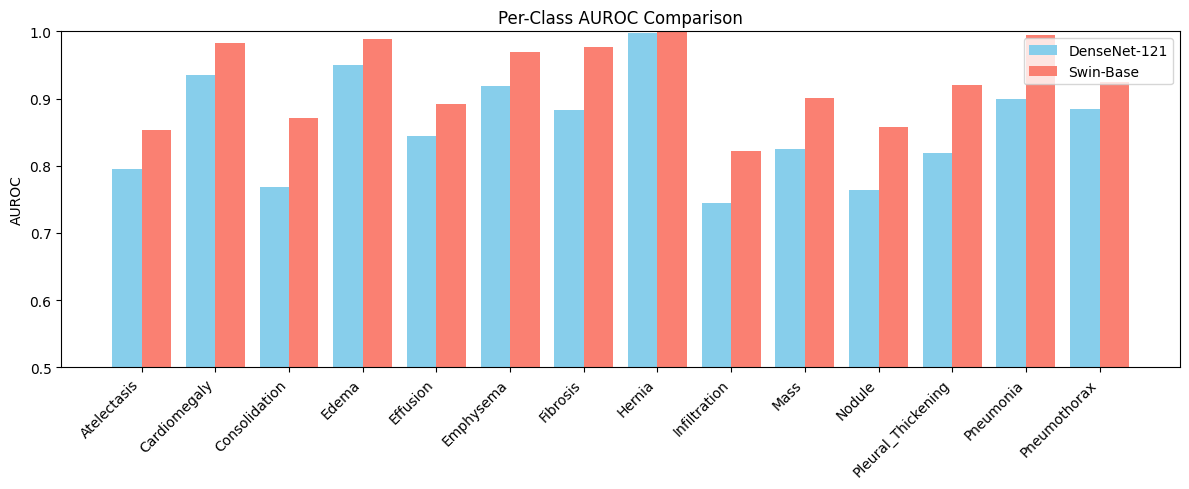

In [5]:
# Extract per-class AUROC values (last epoch assumed)
dn_aucs = dn121.filter(like='roc_auc').iloc[-1]
swin_aucs = swinB.filter(like='roc_auc').iloc[-1]

classes = [col.replace('roc_auc_', '') for col in dn_aucs.index]
x = np.arange(len(classes))
width = 0.4

plt.figure(figsize=(12, 5))
plt.bar(x, dn_aucs, width=width, label='DenseNet-121', color='skyblue')
plt.bar(x + width, swin_aucs, width=width, label='Swin-Base', color='salmon')

plt.xticks(x + width / 2, classes, rotation=45, ha='right')
plt.ylabel('AUROC')
plt.ylim(0.5, 1.0)
plt.title('Per-Class AUROC Comparison')
plt.legend()
plt.tight_layout()
plt.savefig(r"figures\misc\AUROCs.png", dpi=300)
plt.show()


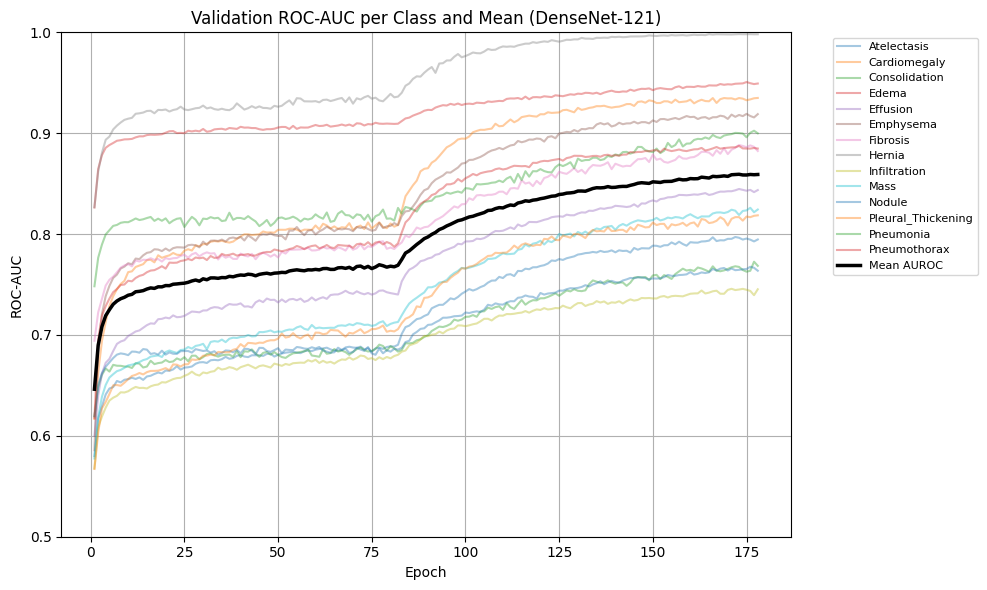

In [6]:
# Extract values
roc_auc_cols = [col for col in dn121.columns if col.startswith('roc_auc_')]
val_roc_aucs_by_epoch_np = dn121[roc_auc_cols].values
val_roc_auc_means = dn121[roc_auc_cols].mean(axis=1).values
epochs_range = dn121['epoch'].values

# Plot all per-class AUROCs + mean
plt.figure(figsize=(10, 6))
for i in range(val_roc_aucs_by_epoch_np.shape[1]):
    plt.plot(epochs_range, val_roc_aucs_by_epoch_np[:, i], label=classes[i], alpha=0.4)

# Plot mean AUROC
plt.plot(epochs_range, val_roc_auc_means, label='Mean AUROC', color='black', linewidth=2.5)

plt.title("Validation ROC-AUC per Class and Mean (DenseNet-121)")
plt.xlabel("Epoch")
plt.ylabel("ROC-AUC")
plt.ylim(0.5, 1.0)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.savefig(r"figures\misc\AUROCs_Train_DNet.png", dpi=300)
plt.show()

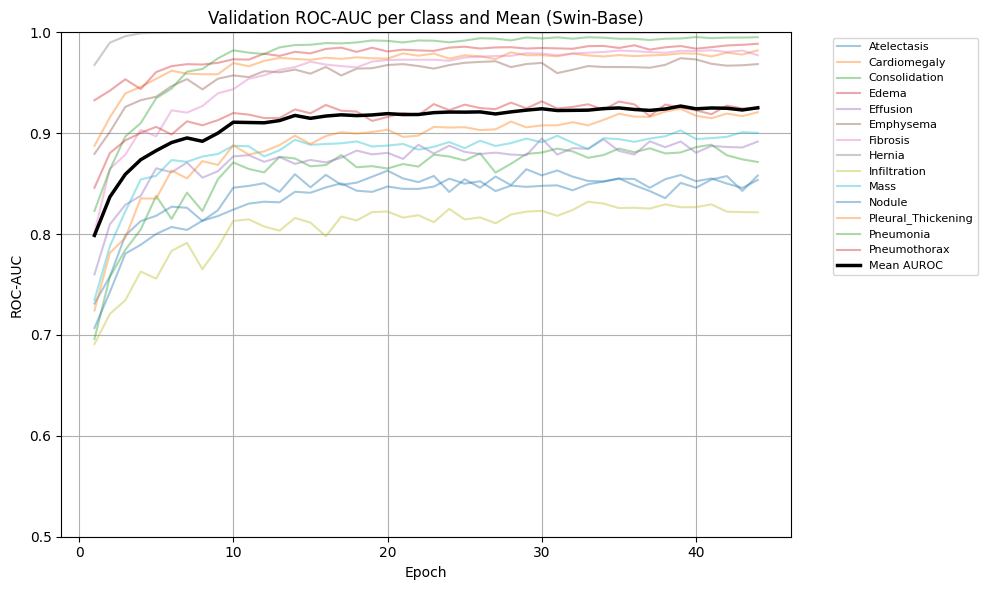

In [7]:
# Extract values
roc_auc_cols = [col for col in swinB.columns if col.startswith('roc_auc_')]
val_roc_aucs_by_epoch_np = swinB[roc_auc_cols].values
val_roc_auc_means = swinB[roc_auc_cols].mean(axis=1).values
epochs_range = swinB['epoch'].values

# Plot all per-class AUROCs + mean
plt.figure(figsize=(10, 6))
for i in range(val_roc_aucs_by_epoch_np.shape[1]):
    plt.plot(epochs_range, val_roc_aucs_by_epoch_np[:, i], label=classes[i], alpha=0.4)

# Plot mean AUROC
plt.plot(epochs_range, val_roc_auc_means, label='Mean AUROC', color='black', linewidth=2.5)

plt.title("Validation ROC-AUC per Class and Mean (Swin-Base)")
plt.xlabel("Epoch")
plt.ylabel("ROC-AUC")
plt.ylim(0.5, 1.0)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.savefig(r"figures\misc\AUROCs_Train_Swin.png", dpi=300)
plt.show()

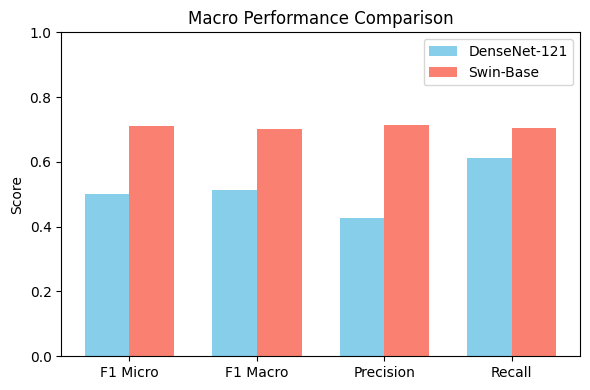

In [8]:
# Extract last-epoch values
metrics = ['f1_micro', 'f1_macro', 'precision', 'recall']
dn_metrics = dn121[metrics].iloc[-1]
swin_metrics = swinB[metrics].iloc[-1]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(6, 4))
plt.bar(x, dn_metrics, width=width, label='DenseNet-121', color='skyblue')
plt.bar(x + width, swin_metrics, width=width, label='Swin-Base', color='salmon')

plt.xticks(x + width / 2, [m.replace('_', ' ').title() for m in metrics])
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.title('Macro Performance Comparison')
plt.legend()
plt.tight_layout()
plt.savefig(r"figures\misc\F1s.png", dpi=300)
plt.show()


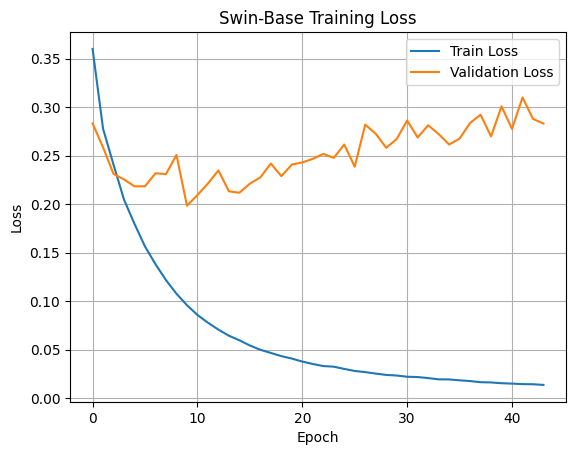

In [9]:
plt.plot(swinB['train_loss'], label='Train Loss')
plt.plot(swinB['val_loss'], label='Validation Loss')
plt.title("Swin-Base Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.savefig(r"figures\misc\Training_Losses.png", dpi=300)
plt.show()